In [53]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from implementations import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Load and clean the training data**

We load the training data.

In [54]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("../data")

print(f"The data has {x_train.shape[0]} samples and {x_train.shape[1]} features !")

The data has 328135 samples and 321 features !


We clean the data by : 
- removing the nan values by the mean of the rest of the feature
- removing the features where the variance is zero since they are constants for all samples
- remove the 8 first features as the appear weird in the task of predicting a heart attack

In [55]:
x_train, zero_var_features = gen_clean(x_train)
print(f"The data has now {x_train.shape[1]} features !")

The data has now 305 features !


We then separe the data to train on 60% of the total and to test it on the remaining 40% 

In [56]:
tx_tr, tx_te, y_tr, y_te = cross(x_train, y_train, 0.6)

print(f"tx_tr shape : {tx_tr.shape} ; tx_te shape : {tx_te.shape}")
print(f"       y_tr : {y_tr.shape}     ;        y_te : {y_te.shape}")

tx_tr shape : (196881, 305) ; tx_te shape : (131254, 305)
       y_tr : (196881,)     ;        y_te : (131254,)


Now we build our models for linear regression

In [57]:
y, tx = build_model_data(tx_tr, y_tr)
y_test, tx_test = build_model_data(tx_te, y_te)
print(f"The data has now {tx.shape[1]} features !")

The data has now 306 features !


## Linear regression using gradient descent

Here we train our model using GD with MSE

In [58]:
initial_w = np.zeros(tx.shape[1])
max_iters = 100
gamma = 0.09

start_time = datetime.datetime.now()
w, loss = mean_squared_error_gd(y, tx, initial_w, max_iters, gamma)
end_time = datetime.datetime.now()
print(f"Execution time {(end_time - start_time).total_seconds()} seconds")

Execution time 9.249509 seconds


### Computation of metrics

We first compute some metrics on the training data (60% of the total data)

In [70]:
pred_data = np.dot(tx, w)

pred_data[pred_data > 0] = 1
pred_data[pred_data < 0] = -1

correctly_classified_data = np.sum(pred_data == y)

tp = np.sum((pred_data == 1) & (y == 1))
fp = np.sum((pred_data == 1) & (y == -1))

tn = np.sum((pred_data == -1) & (y == -1))
fn = np.sum((pred_data == -1) & (y == 1))

accuracy_data = (tp + tn)/(tp + fp + tn + fn)

print(f"Accuracy: {accuracy_data*100}%")
print(f"True positive rate: {tp/(tp + fp)*100}%")
print(f"True negative rate: {tn/(tn + fn)*100}%")
print(f"F1-score : {tp/(tp + 0.5*(fn + fp))*100}%")

Accuracy: 91.25766325851656%
True positive rate: 61.53846153846154%
True negative rate: 91.2674782538005%
F1-score : 0.4626416840157298%


Now we compute some metrics for our test data (40% of the total data)

In [71]:
pred_test = np.dot(tx_test, w)

pred_test[pred_test > 0] = 1
pred_test[pred_test < 0] = -1

correctly_classified_test = np.sum(pred_test == y_test)

tp = np.sum((pred_test == 1) & (y_test == 1))
fp = np.sum((pred_test == 1) & (y_test == -1))

tn = np.sum((pred_test == -1) & (y_test == -1))
fn = np.sum((pred_test == -1) & (y_test == 1))

accuracy_test = (tp + tn)/(tp + fp + tn + fn)

print(f"Accuracy: {accuracy_test*100}%")
print(f"Precision: {tp/(tp + fp)*100}%")
print(f"Recall : {tp/(tp + fn)*100}%")
print(f"F1-score : {tp/(tp + 0.5*(fn + fp))*100}%")

Accuracy: 91.05932009691134%
Precision: 67.56756756756756%
Recall : 0.21280217909431395%
F1-score : 0.42426813746287656%


### Feature analysis

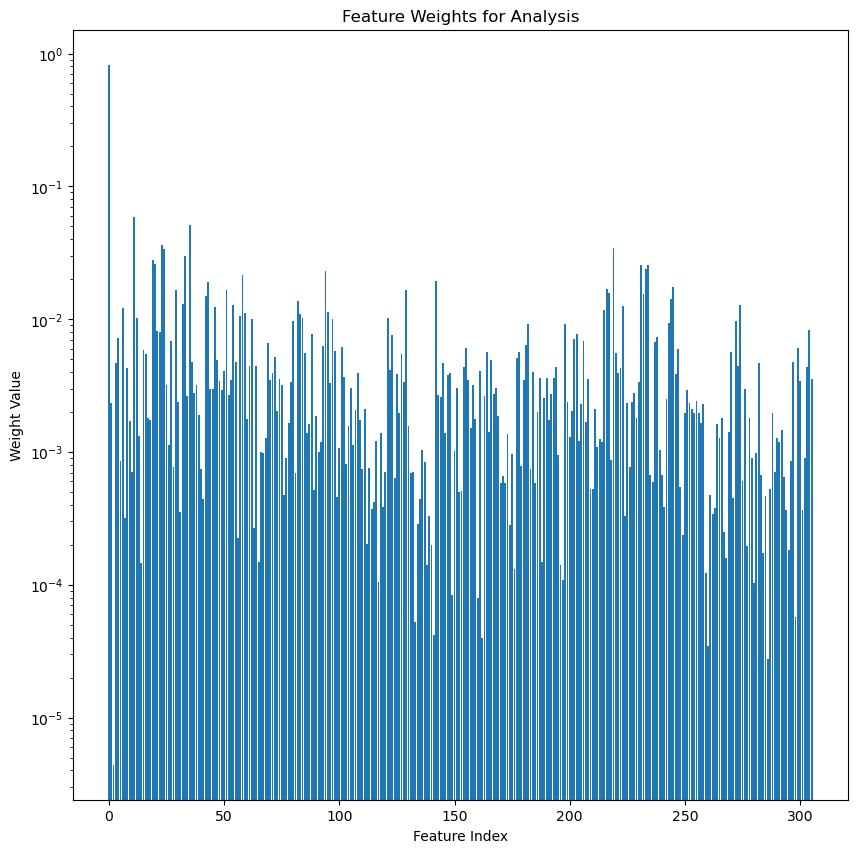

In [61]:
plt.figure(figsize=(10, 10))
plt.bar(range(len(w)), np.abs(w))
plt.yscale('log')
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.title('Feature Weights for Analysis')
plt.show()

# Prediction on test data

In [62]:
start_time = datetime.datetime.now()

data_te = np.ones(x_test.shape)

for i in range(data_te.shape[1]):
    d, _ = standardize_clean(x_test[:, i])
    data_te[:, i] = d
    
data_var_te = data_te[:, zero_var_features]
data_var_te = np.squeeze(data_var_te, axis = 1)
data_cleaned_te = data_var_te[:, 10:]

end_time = datetime.datetime.now()
print(f"Execution time {(end_time - start_time).total_seconds()} seconds")

Execution time 2.000904 seconds


In [63]:
tx_te = np.c_[np.ones(data_cleaned_te.shape[0]), data_cleaned_te]
print(tx_te.shape)

(109379, 306)


In [64]:
y_te = np.dot(tx_te, w)
print(y_te.shape)

(109379,)


In [65]:
pred_te = y_te

pred_te[pred_te > 0] = 1
pred_te[pred_te < 0] = -1

indices_one = np.where(pred_te == 1)
print(indices_one)

(array([  3319,   3977,   4268,   5318,   6412,   7225,   7891,  12597,
        14173,  14264,  15174,  16740,  18300,  22547,  26545,  27709,
        30049,  37162,  37611,  38010,  43658,  44268,  49372,  52959,
        58082,  60210,  62025,  62615,  63353,  76932,  77421,  85061,
        87577,  88686,  89972,  95063,  95599, 103828, 104037, 104615,
       105100, 105227]),)


In [66]:
create_csv_submission(test_ids, pred_te, "../data/prediction.csv")